<a href="https://colab.research.google.com/github/shameer-phy/ML/blob/main/Hackathons/univ.ai/Univhack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive 

drive.mount("/content/gdrive") 

Mounted at /content/gdrive


In [3]:
# Lets read the training dataset and tes dataset

df = pd.read_csv('/content/gdrive/My Drive/Datasets/univ.ai/Training Data.csv')
 
df_test = pd.read_csv('/content/gdrive/My Drive/Datasets/univ.ai/Test Data.csv')


#Lets do som exploratory data analysis

In [5]:
df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [6]:
df.shape

(252000, 13)

In [7]:
df.dtypes

Id                      int64
income                  int64
age                     int64
experience              int64
married                object
house_ownership        object
car_ownership          object
profession             object
city                   object
state                  object
current_job_years       int64
current_house_years     int64
risk_flag               int64
dtype: object

In [20]:
df.isnull().sum()

Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64

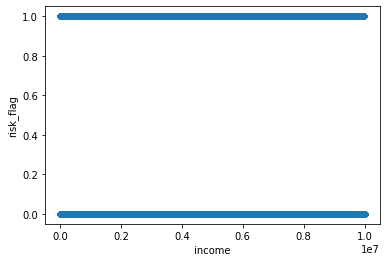

In [22]:
df.plot.scatter('income','risk_flag')

In [9]:
obj_cols = df.select_dtypes(include='object').columns
obj_cols

Index(['married', 'house_ownership', 'car_ownership', 'profession', 'city',
       'state'],
      dtype='object')

In [11]:
!pip install researchpy
def chi2test(x,y):
  import researchpy as rp
  t = rp.crosstab(x,y,test='chi-square')
  if t[1].iloc[1,1] < 0.05:
    print(t[0])
    print('Depedent. Drop a variable')
  else:
    print('Independent. Keep both')

In [13]:
chi2test(df[obj_cols[0]],df[obj_cols[1]])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                house_ownership                       
house_ownership    norent_noown  owned  rented     All
married                                               
married                     595    923   24210   25728
single                     6589  11995  207688  226272
All                        7184  12918  231898  252000
Depedent. Drop a variable


In [14]:
chi2test(df[obj_cols[0]],df[obj_cols[2]])

Independent. Keep both


In [15]:
chi2test(df[obj_cols[0]],df[obj_cols[3]])

                       profession          ...                     
profession Air_traffic_controller Analyst  ... Web_designer     All
married                                    ...                     
married                       543     459  ...          588   25728
single                       4738    4209  ...         4809  226272
All                          5281    4668  ...         5397  252000

[3 rows x 52 columns]
Depedent. Drop a variable


In [16]:
chi2test(df[obj_cols[0]],df[obj_cols[4]])

         city                 ...                                     
city    Adoni Agartala  Agra  ... Warangal[11][12] Yamunanagar     All
married                       ...                                     
married    87      128    88  ...               10          89   25728
single    866      681   924  ...              449         570  226272
All       953      809  1012  ...              459         659  252000

[3 rows x 318 columns]
Depedent. Drop a variable


In [17]:
chi2test(df[obj_cols[0]],df[obj_cols[5]])

                 state               ...                                
state   Andhra_Pradesh Assam  Bihar  ... Uttarakhand West_Bengal     All
married                              ...                                
married           2994   525   1937  ...          92        2870   25728
single           22303  6537  17843  ...        1782       20613  226272
All              25297  7062  19780  ...        1874       23483  252000

[3 rows x 30 columns]
Depedent. Drop a variable


In [19]:
obj_cols

Index(['married', 'house_ownership', 'car_ownership', 'profession', 'city',
       'state'],
      dtype='object')

In [23]:
df.nunique()

Id                     252000
income                  41917
age                        59
experience                 21
married                     2
house_ownership             3
car_ownership               2
profession                 51
city                      317
state                      29
current_job_years          15
current_house_years         5
risk_flag                   2
dtype: int64

In [26]:
obj_cols = list(obj_cols)
obj_cols.remove('profession')
obj_cols.remove('car_ownership')

In [27]:
obj_cols

['married', 'house_ownership', 'city', 'state']

In [28]:
obj_cols.append('Id')

In [29]:
obj_cols

['married', 'house_ownership', 'city', 'state', 'Id']

In [46]:
new_df = df.drop(obj_cols,axis=1)


In [47]:
obj_cols.remove('Id')
obj_cols.append('id')
new_dftest = df_test.drop(obj_cols,axis=1)

In [31]:
new_df.head()

,income,age,experience,car_ownership,profession,current_job_years,current_house_years,risk_flag
0,1303835,23,3,no,Mechanical_engineer,3,13,0
1,7574516,40,10,no,Software_Developer,9,13,0
2,3991815,66,4,no,Technical_writer,4,10,0
3,6256451,41,2,yes,Software_Developer,2,12,1
4,5768871,47,11,no,Civil_servant,3,14,1


In [33]:
new_df.corr()

,income,age,experience,current_job_years,current_house_years,risk_flag
income,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
age,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
experience,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
current_job_years,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
current_house_years,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
risk_flag,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


In [34]:
new_df.nunique()

income                 41917
age                       59
experience                21
car_ownership              2
profession                51
current_job_years         15
current_house_years        5
risk_flag                  2
dtype: int64

In [48]:
new_df = new_df.drop('current_job_years',axis=1)
new_dftest = new_dftest.drop('current_job_years',axis=1)

In [38]:
new_df.corr()

,income,age,experience,current_house_years,risk_flag
income,1.000000,-0.000652,0.006422,-0.002397,-0.003091
age,-0.000652,1.000000,-0.001118,-0.020134,-0.021809
experience,0.006422,-0.001118,1.000000,0.019309,-0.034523
current_house_years,-0.002397,-0.020134,0.019309,1.000000,-0.004375
risk_flag,-0.003091,-0.021809,-0.034523,-0.004375,1.000000


In [50]:
new_df = pd.get_dummies(new_df,columns=['profession','car_ownership'])
new_dftest = pd.get_dummies(new_dftest,columns=['profession','car_ownership'])

In [54]:
new_df.shape
new_dftest.shape

(28000, 57)

In [56]:
new_df.head()

,income,age,experience,current_house_years,risk_flag,profession_Air_traffic_controller,profession_Analyst,profession_Architect,profession_Army_officer,profession_Artist,profession_Aviator,profession_Biomedical_Engineer,profession_Chartered_Accountant,profession_Chef,profession_Chemical_engineer,profession_Civil_engineer,profession_Civil_servant,profession_Comedian,profession_Computer_hardware_engineer,profession_Computer_operator,profession_Consultant,profession_Dentist,profession_Design_Engineer,profession_Designer,profession_Drafter,profession_Economist,profession_Engineer,profession_Fashion_Designer,profession_Financial_Analyst,profession_Firefighter,profession_Flight_attendant,profession_Geologist,profession_Graphic_Designer,profession_Hotel_Manager,profession_Industrial_Engineer,profession_Lawyer,profession_Librarian,profession_Magistrate,profession_Mechanical_engineer,profession_Microbiologist,profession_Official,profession_Petroleum_Engineer,profession_Physician,profession_Police_officer,profession_Politician,profession_Psychologist,profession_Scientist,profession_Secretary,profession_Software_Developer,profession_Statistician,profession_Surgeon,profession_Surveyor,profession_Technical_writer,profession_Technician,profession_Technology_specialist,profession_Web_designer,car_ownership_no,car_ownership_yes
0,1303835,23,3,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7574516,40,10,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,3991815,66,4,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,6256451,41,2,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,5768871,47,11,14,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [57]:
new_dftest.head()

,income,age,experience,current_house_years,profession_Air traffic controller,profession_Analyst,profession_Architect,profession_Army officer,profession_Artist,profession_Aviator,profession_Biomedical Engineer,profession_Chartered Accountant,profession_Chef,profession_Chemical engineer,profession_Civil engineer,profession_Civil servant,profession_Comedian,profession_Computer hardware engineer,profession_Computer operator,profession_Consultant,profession_Dentist,profession_Design Engineer,profession_Designer,profession_Drafter,profession_Economist,profession_Engineer,profession_Fashion Designer,profession_Financial Analyst,profession_Firefighter,profession_Flight attendant,profession_Geologist,profession_Graphic Designer,profession_Hotel Manager,profession_Industrial Engineer,profession_Lawyer,profession_Librarian,profession_Magistrate,profession_Mechanical engineer,profession_Microbiologist,profession_Official,profession_Petroleum Engineer,profession_Physician,profession_Police officer,profession_Politician,profession_Psychologist,profession_Scientist,profession_Secretary,profession_Software Developer,profession_Statistician,profession_Surgeon,profession_Surveyor,profession_Technical writer,profession_Technician,profession_Technology specialist,profession_Web designer,car_ownership_no,car_ownership_yes
0,7393090,59,19,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1215004,25,5,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8901342,50,12,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1944421,49,9,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,13429,25,18,11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#Lets split the data into X,Y and standardize